In [1]:
from CPD import datasets, loss, models
from CPD import new_metrics as metrics

%load_ext autoreload
%autoreload

import pytorch_lightning as pl
import torch.nn as nn

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

# Paramteres initialization 

In [2]:
# input data parameters
SEQ_LEN = 64
IM_SIZE = 28

SEED = 0

In [3]:
HIDDEN_SIZE = 32
input_size = IM_SIZE * IM_SIZE
hidden_rnn = HIDDEN_SIZE
rnn_n_layers = 1
linear_dims = [HIDDEN_SIZE]
rnn_dropout = 0.5
dropout = 0.25

In [4]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 2021

Reusing TensorBoard on port 2021 (pid 2705), started 0:32:54 ago. (Use '!kill 2705' to kill it.)

# InDiD

In [5]:
models.fix_seeds(SEED)

In [6]:
base_model_cpd = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.25, 
                                 dropout=0.5,  rnn_type='LSTM')


cpd_model = models.CPD_model(model=base_model_cpd, T=32,
                             loss_type='CPD', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

/home/eromanenkova/anaconda3/lib/python3.7/site-packages/torch/nn/modules/rnn.py:63: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.25 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [7]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_cpd'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.01, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs =100, 
    gpus='0', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1,    
    logger = logger, 
    callbacks = [checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [8]:
trainer.fit(cpd_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 1.255


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.253 >= min_delta = 0.01. New best score: 1.002


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.196 >= min_delta = 0.01. New best score: 0.805


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.198 >= min_delta = 0.01. New best score: 0.608


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.237 >= min_delta = 0.01. New best score: 0.370


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.413 >= min_delta = 0.01. New best score: -0.042


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.971 >= min_delta = 0.01. New best score: -1.013


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.208 >= min_delta = 0.01. New best score: -3.221


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.857 >= min_delta = 0.01. New best score: -7.078


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.297 >= min_delta = 0.01. New best score: -11.375


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 5.968 >= min_delta = 0.01. New best score: -17.343


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 5.772 >= min_delta = 0.01. New best score: -23.115


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 4.183 >= min_delta = 0.01. New best score: -27.298


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 3.374 >= min_delta = 0.01. New best score: -30.672


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 2.588 >= min_delta = 0.01. New best score: -33.260


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.614 >= min_delta = 0.01. New best score: -34.875


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.311 >= min_delta = 0.01. New best score: -36.186


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.850 >= min_delta = 0.01. New best score: -37.036


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.716 >= min_delta = 0.01. New best score: -37.753


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.679 >= min_delta = 0.01. New best score: -38.432


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.276 >= min_delta = 0.01. New best score: -38.708


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.363 >= min_delta = 0.01. New best score: -39.070


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.332 >= min_delta = 0.01. New best score: -39.402


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.178 >= min_delta = 0.01. New best score: -39.581


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.121 >= min_delta = 0.01. New best score: -39.702


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.194 >= min_delta = 0.01. New best score: -39.896


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.374 >= min_delta = 0.01. New best score: -40.270


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.071 >= min_delta = 0.01. New best score: -40.340


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.038 >= min_delta = 0.01. New best score: -40.379


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.077 >= min_delta = 0.01. New best score: -40.456


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.154 >= min_delta = 0.01. New best score: -40.610


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: -40.626


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.043 >= min_delta = 0.01. New best score: -40.668


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.071 >= min_delta = 0.01. New best score: -40.739


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: -40.763


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.122 >= min_delta = 0.01. New best score: -40.884


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.092 >= min_delta = 0.01. New best score: -40.976


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.074 >= min_delta = 0.01. New best score: -41.050


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.051 >= min_delta = 0.01. New best score: -41.101


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.027 >= min_delta = 0.01. New best score: -41.128


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.094 >= min_delta = 0.01. New best score: -41.222


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.105 >= min_delta = 0.01. New best score: -41.326


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.032 >= min_delta = 0.01. New best score: -41.358


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: -41.377


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.047 >= min_delta = 0.01. New best score: -41.424


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: -41.448


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -41.448. Signaling Trainer to stop.


# BCE_seq2seq model

In [9]:
models.fix_seeds(SEED)

In [10]:
import torch
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.cuda.manual_seed_all(SEED)
import random
random.seed(SEED)
import numpy as np
np.random.seed(SEED)

In [11]:
base_model_bce = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.25, 
                                 dropout=0.5,  rnn_type='LSTM')


bce_model = models.CPD_model(model=base_model_bce, T=None,
                             loss_type='BCE', experiment_type='mnist', 
                             lr=0.001, batch_size=64)

In [12]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

experiment_name = 'mnist_bce'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.01, patience=5, 
                                    verbose=True, mode="min")

from pytorch_lightning.callbacks import ModelCheckpoint
checkpoint_callback = ModelCheckpoint(
    dirpath='saves',
    filename='{epoch}-{val_loss:.2f}-{val_acc:.2f}', 
    every_n_val_epochs=2)

trainer = pl.Trainer(
    max_epochs=100, 
    gpus='0', 
    benchmark=True, 
    check_val_every_n_epoch=1,
    gradient_clip_val=1,    
    logger = logger, 
    callbacks = [checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [13]:
trainer.fit(bce_model)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.488


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.135 >= min_delta = 0.01. New best score: 0.353


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.089 >= min_delta = 0.01. New best score: 0.264


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.061 >= min_delta = 0.01. New best score: 0.203


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.039 >= min_delta = 0.01. New best score: 0.164


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.142


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.127


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.115


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.098


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.087


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.075


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.075. Signaling Trainer to stop.


# Combined

In [14]:
models.fix_seeds(SEED)

In [15]:
import torch
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True
torch.cuda.manual_seed_all(SEED)
import random
random.seed(SEED)
import numpy as np
np.random.seed(SEED)

In [16]:
base_model_comb = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                 linear_dims, rnn_dropout=0.25, 
                                 dropout=0.5,  rnn_type='LSTM')

combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                    loss_type='BCE', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

combined_model_2 = models.CPD_model(model=base_model_comb, T=32,
                                    loss_type='CPD', experiment_type='mnist', 
                                    lr=0.001, batch_size=64)

In [17]:
experiment_name = 'mnist_comb'
logger = pl.loggers.TensorBoardLogger(save_dir='logs/', name=experiment_name)

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor='val_acc',
    dirpath=f'logs/{experiment_name}',
    filename='{epoch:02d}-{val_acc:.3f}',
    mode='max')

early_stop_callback = EarlyStopping(monitor="val_loss", 
                                    min_delta=0.01, patience=5, 
                                    verbose=True, mode="min")

trainer_1 = pl.Trainer(
    max_epochs=50, 
    gpus='0', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

trainer_2 = pl.Trainer(
    max_epochs=50, 
    gpus='0', 
    benchmark=True, 
    check_val_every_n_epoch=1, 
    gradient_clip_val=1,
    logger=logger,
    callbacks=[checkpoint_callback, early_stop_callback])

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores


In [18]:
trainer_1.fit(combined_model_1)
trainer_2.fit(combined_model_2)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.488


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.135 >= min_delta = 0.01. New best score: 0.353


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.089 >= min_delta = 0.01. New best score: 0.264


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.061 >= min_delta = 0.01. New best score: 0.203


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.039 >= min_delta = 0.01. New best score: 0.164


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.022 >= min_delta = 0.01. New best score: 0.142


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.015 >= min_delta = 0.01. New best score: 0.127


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.115


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.017 >= min_delta = 0.01. New best score: 0.098


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.087


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.075


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.075. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 37.228 >= min_delta = 0.01. New best score: -37.152


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.836 >= min_delta = 0.01. New best score: -38.989


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 1.102 >= min_delta = 0.01. New best score: -40.091


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.611 >= min_delta = 0.01. New best score: -40.702


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.603 >= min_delta = 0.01. New best score: -41.304


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.237 >= min_delta = 0.01. New best score: -41.542


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.351 >= min_delta = 0.01. New best score: -41.893


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.191 >= min_delta = 0.01. New best score: -42.083


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.096 >= min_delta = 0.01. New best score: -42.180


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.162 >= min_delta = 0.01. New best score: -42.342


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.141 >= min_delta = 0.01. New best score: -42.483


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.229 >= min_delta = 0.01. New best score: -42.712


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.079 >= min_delta = 0.01. New best score: -42.791


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.097 >= min_delta = 0.01. New best score: -42.888


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.090 >= min_delta = 0.01. New best score: -42.977


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.116 >= min_delta = 0.01. New best score: -43.093


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: -43.093. Signaling Trainer to stop.


# EMBEDDINGS!

In [60]:
cpd_model

CPD_model(
  (model): MnistRNN(
    (rnn): LSTM(784, 32, batch_first=True, dropout=0.25)
    (linears): ModuleList()
    (output_layer): Linear(in_features=32, out_features=1, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (sigmoid): Sigmoid()
    (relu): ReLU(inplace=True)
  )
  (loss): CPDLoss()
)

In [58]:
def explore_l2(main_model, dataloader):
    main_model.to('cuda')
    main_model.eval()
    for inputs, labels in dataloader:
        for i, seq in enumerate(inputs):
            seq = seq.float().to('cuda')
            emd_seq = main_model.model.rnn(seq.flatten(1, 2).unsqueeze(0))[0].squeeze(0)
            l2_dist = []
            l2_dist_original = []
            l2_dist += [((x - y)**
                         2).sum().detach().cpu().numpy() for x, y in zip(emd_seq[1:], emd_seq[:-1])]        
            l2_dist = l2_dist[3:]
            l2_dist = l2_dist / max(l2_dist)

            l2_dist_original += [((x - y)**2).sum().detach().cpu().numpy() for x, y in zip(seq[1:], seq[:-1])]
            l2_dist_original = l2_dist_original[3:]
            l2_dist_original = l2_dist_original / max(l2_dist_original)

            f, ax1 = plt.subplots(sharex=True)
            ax2 = ax1.twinx()
            ax1.plot(l2_dist, label='l2_embeddings', color='orange')
            ax2.plot(l2_dist_original, label='l2_original_space')        
            ax1.plot(labels[i][1:], color='green', label='true labels')
            ax1.legend()
            ax2.legend()
            break

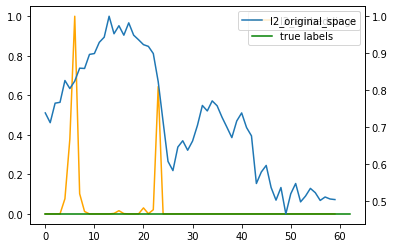

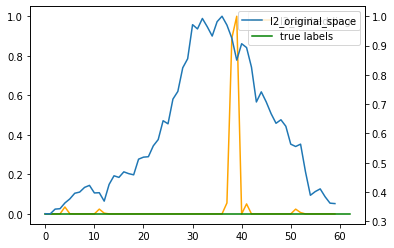

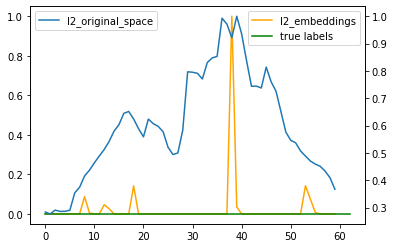

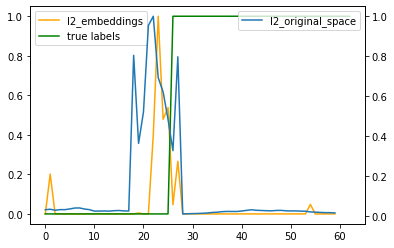

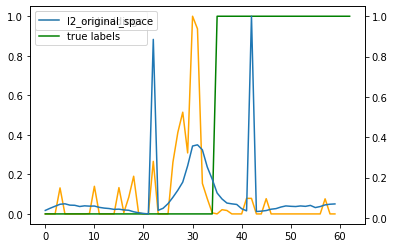

In [59]:
explore_l2(cpd_model, cpd_model.val_dataloader())

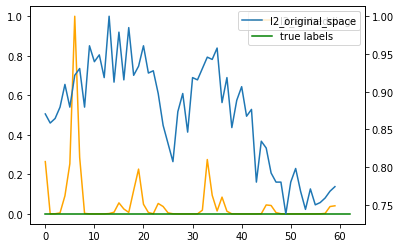

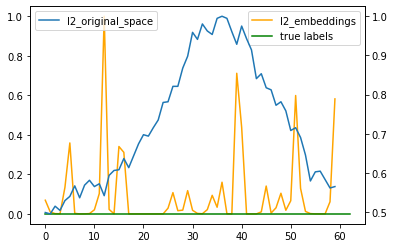

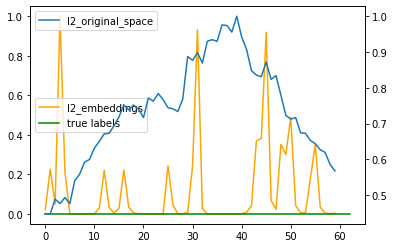

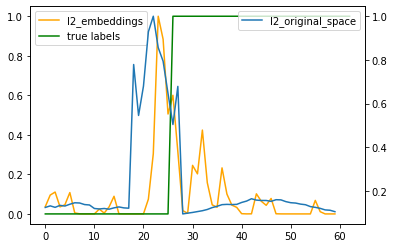

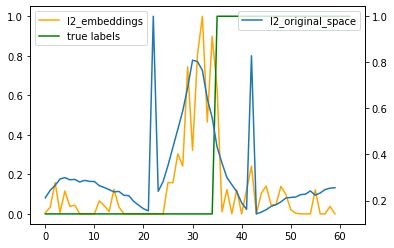

In [57]:
explore_l2(bce_model, cpd_model.val_dataloader())

In [14]:
def plot_predictions(cpd_model, bce_model, comb_model, dataloader):
    main_model.to('cuda')
    main_model.eval()
    for inputs, labels in dataloader:
        for i, seq in enumerate(inputs):
            seq = seq.float().to('cuda')
            cpd_out = cpd_model(seq.unsqueeze(0)).squeeze()
            bce_out = bce_model(seq.unsqueeze(0)).squeeze()
            comb_out = comb_model(seq.unsqueeze(0)).squeeze()
            
            f, ax1 = plt.subplots(sharex=True, figsize=(10, 8))
            ax1.plot(cpd_out.detach().cpu().numpy(), label='CPD', color='orange')
            ax1.plot(bce_out.detach().cpu().numpy(), label='BCE')
            ax1.plot(comb_out.detach().cpu().numpy(), label='InDiD', color='green')
            ax1.plot(labels[i][1:], color='green', label='True labels')
            ax1.legend()
            break
        break

In [15]:
plot_predictions(cpd_model, bce_model, combined_model_2, cpd_model.val_dataloader())

NameError: name 'combined_model_2' is not defined


# TSNE

In [44]:
import pandas as pd
from sklearn.manifold import TSNE

def get_embeddings(main_model, device='cuda'):

    all_outputs = []
    all_labels = []
    all_times = []

    device='cuda'

    main_model.to(device)

    for batch, labels in cpd_model.val_dataloader():
        batch = batch.to(device)
        batch_size, time_steps, h, w = batch.shape
        r_out, _ = main_model.model.rnn(batch.flatten(2, 3).float())
        r_out = r_out.flatten(0, 1)
        all_outputs.extend(r_out.detach().cpu().numpy())
        all_labels.extend(labels)


    for label in all_labels:
        y = np.where(label != 0)[0]
        if len(y) > 0:
            all_times.extend([-1] * (y[0]) + list(y))
        else:
            all_times.extend([-1] * len(label))    

    all_labels = np.concatenate(all_labels).flatten()
    all_times = np.array(all_times)        
    all_outputs = np.stack(all_outputs)
    
    return all_outputs, all_labels, all_times

def make_tsne(main_model, device='cuda'):
    all_outputs, all_labels, all_times = get_embeddings(main_model, device)
    embedding = TSNE(n_components=2, perplexity=25).fit_transform(all_outputs)
    embedding_df = pd.DataFrame(embedding, columns=['embed_x', 'embed_y'])
    embedding_df['labels'] = all_labels
    embedding_df['time_to_change'] = all_times
    return embedding_df
    

def plot_tsne(data, filename=None):
    plt.figure(figsize=(10, 10))
    plt.plot(data.loc[data['time_to_change'] == -1, 'embed_x'], 
             data.loc[data['time_to_change'] == -1, 'embed_y'], 'o', alpha=0.5, markersize=3, label='Normal data');

    plt.plot(data.loc[(data['time_to_change'] > -1) & (data['time_to_change'] < 20), 'embed_x'], 
             data.loc[(data['time_to_change'] > -1) & (data['time_to_change'] < 20), 'embed_y'], 
             's', alpha=0.8, markersize=5, label='Time after change < 20');

    plt.plot(data.loc[(data['time_to_change'] > 20) & (data['time_to_change'] < 60), 'embed_x'], 
             data.loc[(data['time_to_change'] > 20) & (data['time_to_change'] < 60), 'embed_y'], 
             'd', alpha=0.5, markersize=3, label='Time after change > 20', c='#bcbd22');

    plt.legend(loc='upper right', markerscale=3, fontsize=24)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight', dpi=500)
    else:
        plt.show()

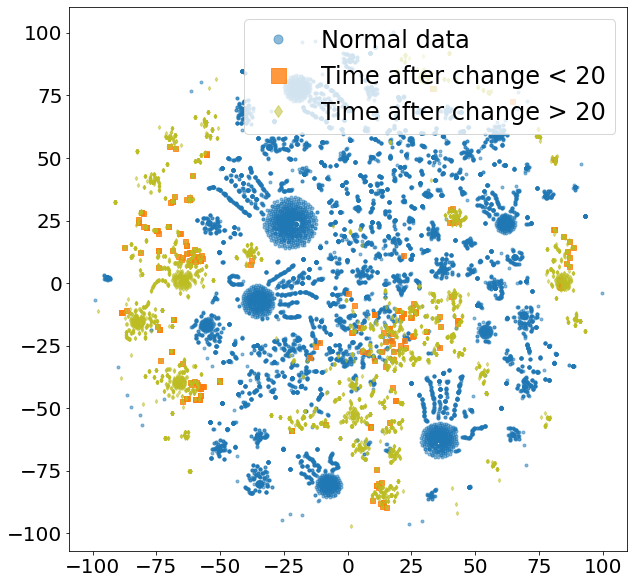

In [45]:
models.fix_seeds(0)
cpd_data = make_tsne(cpd_model)
plot_tsne(cpd_data, 'MNIST_cpd_tsne.pdf')

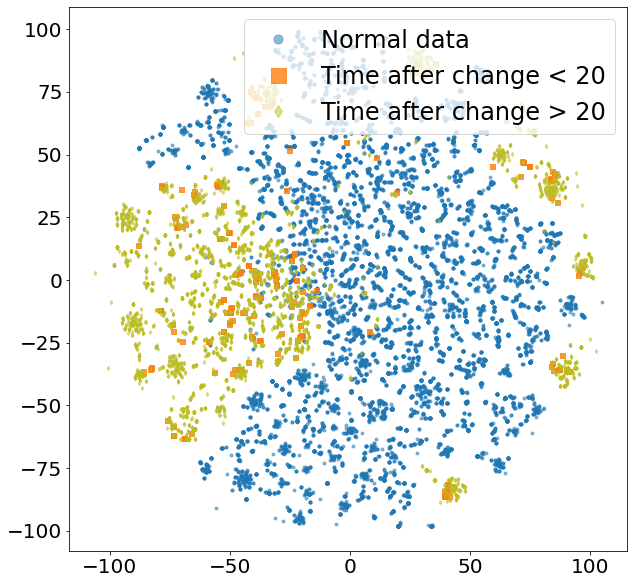

In [46]:
models.fix_seeds(0)
bce_data = make_tsne(bce_model)
plot_tsne(bce_data, 'MNIST_bce_tsne.pdf')

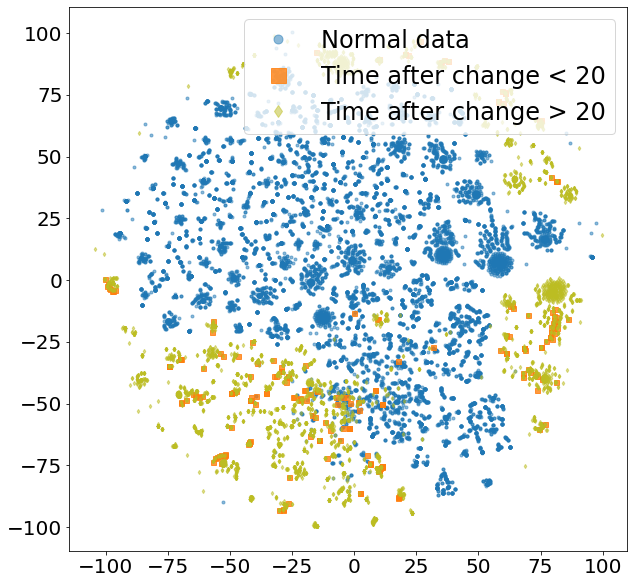

In [47]:
models.fix_seeds(0)
comb_data = make_tsne(combined_model_2)
plot_tsne(comb_data, 'MNIST_comb_tsne.pdf')

# T

In [ ]:
threshold_number = 100
#threshold_number = 25
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

SEED = 123
for T in [1, 4, 8, 16, 32, 48, 64]:
    models.fix_seeds(SEED)
    base_model_comb = models.MnistRNN(input_size, hidden_rnn, rnn_n_layers, 
                                     linear_dims, rnn_dropout=0.25, 
                                     dropout=0.5,  rnn_type='LSTM')

    combined_model_1 = models.CPD_model(model=base_model_comb, T=None,
                                        loss_type='BCE', experiment_type='mnist', 
                                        lr=0.001, batch_size=64)

    combined_model_2 = models.CPD_model(model=base_model_comb, T=T,
                                        loss_type='CPD', experiment_type='mnist', 
                                        lr=0.001, batch_size=64)
    early_stop_callback = EarlyStopping(monitor="val_loss", 
                                        min_delta=0.01, patience=5, 
                                        verbose=True, mode="min")

    
    experiment_name = 'mnist_comb'
    trainer_1 = pl.Trainer(
        max_epochs=50, 
        gpus='1', 
        check_val_every_n_epoch=1, 
        gradient_clip_val=1,
        logger=logger,
        callbacks=[early_stop_callback])
    
    trainer_2 = pl.Trainer(
        max_epochs=50, 
        gpus='1', 
        check_val_every_n_epoch=1, 
        gradient_clip_val=1,
        logger=logger,
        callbacks=[early_stop_callback])

    trainer_1.fit(combined_model_1)
    trainer_2.fit(combined_model_2)
    print(T)
    _, _, _ = metrics.evaluation_pipeline(combined_model_2, 
                                          cpd_model.val_dataloader(), 
                                          threshold_list, 
                                          device='cuda', 
                                          verbose=True)
    print('------------')

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved. New best score: 0.432


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.114 >= min_delta = 0.01. New best score: 0.317


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.068 >= min_delta = 0.01. New best score: 0.249


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.042 >= min_delta = 0.01. New best score: 0.207


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.031 >= min_delta = 0.01. New best score: 0.176


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.024 >= min_delta = 0.01. New best score: 0.152


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.019 >= min_delta = 0.01. New best score: 0.133


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.016 >= min_delta = 0.01. New best score: 0.117


Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.012 >= min_delta = 0.01. New best score: 0.105


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.014 >= min_delta = 0.01. New best score: 0.091


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.011 >= min_delta = 0.01. New best score: 0.080


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Metric val_loss improved by 0.010 >= min_delta = 0.01. New best score: 0.070


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 5 records. Best score: 0.070. Signaling Trainer to stop.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | CPDLoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Monitored metric val_loss did not improve in the last 6 records. Best score: 0.070. Signaling Trainer to stop.


1


In [32]:
def get_predictions(cpd_model, bce_model, comb_model, dataloader):
    cpd_model.to('cuda')
    cpd_model.eval()
    
    bce_model.to('cuda')
    bce_model.eval()

    comb_model.to('cuda')
    comb_model.eval()
    
    cpd_out = []
    bce_out = []
    comb_out = []
    labels_all = []
    for inputs, labels in dataloader:
        for i, seq in enumerate(inputs):
            seq = seq.float().to('cuda')
            cpd_out += [cpd_model(seq.unsqueeze(0)).squeeze().detach().cpu().numpy()]
            bce_out += [bce_model(seq.unsqueeze(0)).squeeze().detach().cpu().numpy()]
            comb_out += [comb_model(seq.unsqueeze(0)).squeeze().detach().cpu().numpy()]
            labels_all += [labels[i]]
            
    return cpd_out, bce_out, comb_out, labels_all

In [33]:
cpd_out, bce_out, comb_out, labels_all = get_predictions(cpd_model, bce_model, 
                                                         combined_model_2, 
                                                         cpd_model.val_dataloader())

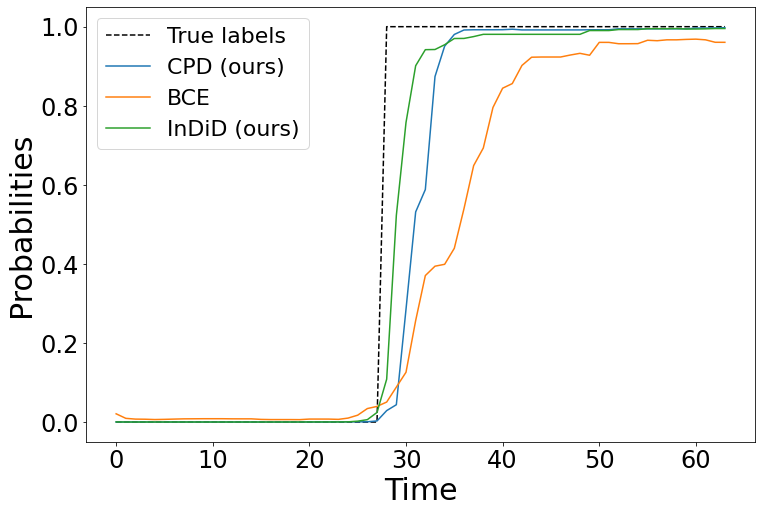

In [156]:
i = 150
f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
ax1.plot(labels_all[i], '--', label='True labels', color='black')
ax1.plot(cpd_out[i], label='CPD (ours)')
ax1.plot(bce_out[i], label='BCE')
ax1.plot(comb_out[i], label='InDiD (ours)')
ax1.legend(fontsize=22)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Probabilities', fontsize=30);
plt.xticks(fontsize=24);
plt.yticks(fontsize=24);
plt.savefig('predictions_1.pdf', dpi=500)

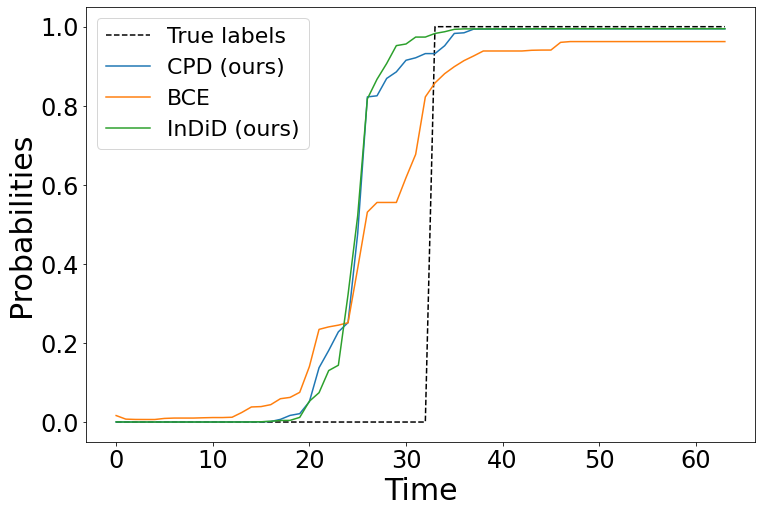

In [157]:
i = 199
f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
ax1.plot(labels_all[i], '--', label='True labels', color='black')
ax1.plot(cpd_out[i], label='CPD (ours)')
ax1.plot(bce_out[i], label='BCE')
ax1.plot(comb_out[i], label='InDiD (ours)')
ax1.legend(fontsize=22)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Probabilities', fontsize=30);
plt.xticks(fontsize=24);
plt.yticks(fontsize=24);
plt.savefig('predictions_2.pdf', dpi=500)

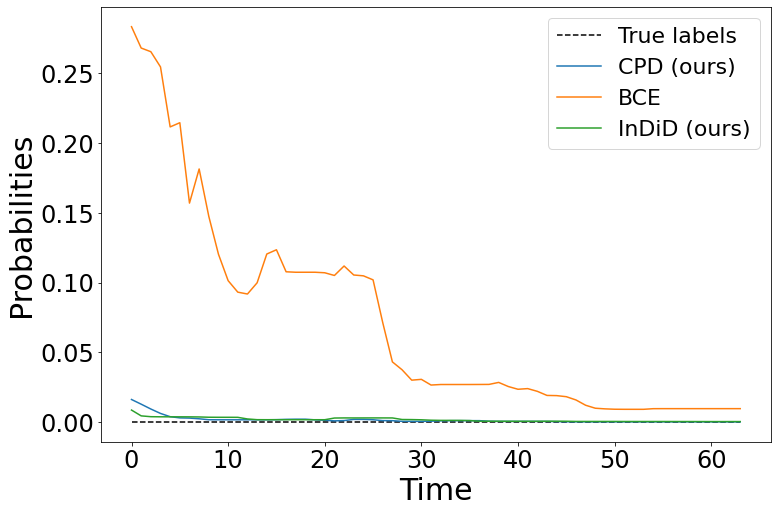

In [158]:
i = 25
f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
ax1.plot(labels_all[i], '--', label='True labels', color='black')
ax1.plot(cpd_out[i], label='CPD (ours)')
ax1.plot(bce_out[i], label='BCE')
ax1.plot(comb_out[i], label='InDiD (ours)')
ax1.legend(fontsize=22)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Probabilities', fontsize=30);
plt.xticks(fontsize=24);
plt.yticks(fontsize=24);
plt.savefig('predictions_3.pdf', dpi=500)

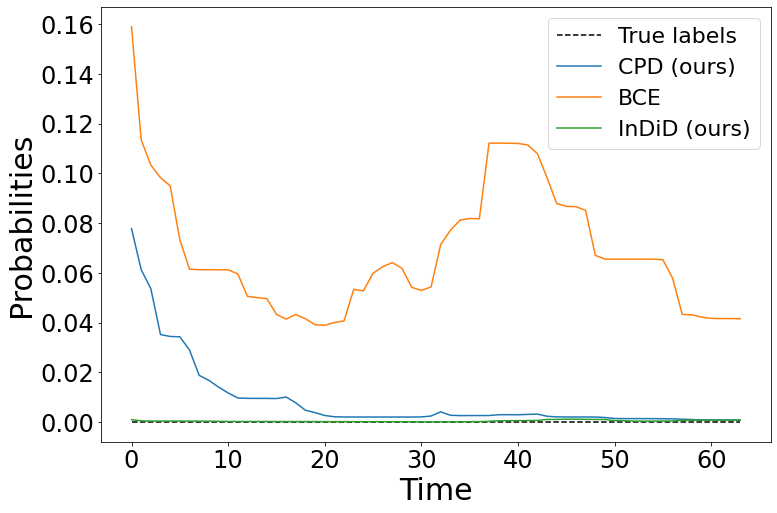

In [159]:
i = 90
f, ax1 = plt.subplots(sharex=True, figsize=(12, 8))
ax1.plot(labels_all[i], '--', label='True labels', color='black')
ax1.plot(cpd_out[i], label='CPD (ours)')
ax1.plot(bce_out[i], label='BCE')
ax1.plot(comb_out[i], label='InDiD (ours)')
ax1.legend(fontsize=22)
plt.xlabel('Time', fontsize=30)
plt.ylabel('Probabilities', fontsize=30);
plt.xticks(fontsize=24);
plt.yticks(fontsize=24);
plt.savefig('predictions_4.pdf', dpi=500)